<a href="https://colab.research.google.com/github/vinayak2019/organic_chem/blob/main/Day1/Acidic_hydrogen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
# @title Run this cell to install the necessary software. { display-mode: "form" }

#@markdown This should take a minute to run.


! pip install pyscf
! pip install rdkit
! pip install geometric
! pip install py3Dmol

import os
import sys
import pyscf
import py3Dmol
import matplotlib.pyplot as plt

from pyscf.hessian import thermo
from pyscf import gto, scf, dft, tools, lo
from pyscf.geomopt.geometric_solver import optimize

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import *

In [ ]:
from IPython.core.display import Image
from copy import deepcopy

#@title Load molecule { run: "auto" }
#@markdown Here we will load the molecule using SMILES representation. The SMILES representation can be generated at https://pubchem.ncbi.nlm.nih.gov//edit3/index.html. Copy the smiles text into this cell.

smiles = "CC(CC(C)=O)=O" #@param {type:"string"}


molecule_name = "molecule"
# drawing_style = "stick" #@param ['stick', 'sphere', 'line','carton']

# Establish RDKit mol object
rd_mol = Chem.MolFromSmiles(smiles)
rdmol_hs = Chem.rdmolops.AddHs(rd_mol)
rdmol_hs_2d = deepcopy(rdmol_hs)
im = Draw.MolsToGridImage([rdmol_hs])
AllChem.EmbedMolecule(rdmol_hs)
AllChem.MMFFOptimizeMolecule(rdmol_hs)
Chem.MolToXYZFile(rdmol_hs, "{}.xyz".format(molecule_name))
im



In [ ]:
%%capture
#@title Run DFT calculations

#@markdown The theory behind DFT is beyond this course. In brief, we are solving Schrodinger equation to get the energy. This process will need information about the hamiltonian operator and the wavefuntion of electron. The functional represents the form of Hamiltonian operator and the basis-set is the equation of wavefunction.

functional = "B3LYP" #@param ["B3LYP", "wb97x"]
basis_set = "3-21G" #@param ["3-21G","6-31G"]




# Set parameters
mol = gto.M(atom=F'{molecule_name}.xyz',  # Establish PySCF mol object
            basis = basis_set,
            verbose=0
            )
mf = mol.KS()
mf.xc = functional  # Set functional

# Run Optimization
# mol_eq = optimize(mf)
# # Save results to file
# mol_eq.tofile(F'{molecule_name}_optimization.xyz')

# Run Optimization
mol_eq = optimize(mf)
# Save results to file
mol_eq.tofile(F'{molecule_name}_opt.xyz')



mol = gto.M(atom=F'{molecule_name}_opt.xyz',  # Establish PySCF mol object
            basis = basis_set,
            verbose=0
            )
mf = mol.KS()
mf.kernel()


In [ ]:
#@title View electrostatic potential map
dm = mf.make_rdm1()
_ = tools.cubegen.mep(mol, f'{molecule_name}_esp.cube',dm,nx=30, ny=30, nz=30,)
_ = tools.cubegen.density(mol, f'{molecule_name}_density.cube',dm,nx=30, ny=30, nz=30,)

def draw_orbital(molecule_name, xyz, orb):
    view = py3Dmol.view(width=400,height=400)
    with open(f'{molecule_name}_esp.cube') as f:
       cube_data = f.read()
    with open(f'{molecule_name}_density.cube') as f:
       density_data = f.read()

    view.addVolumetricData(density_data, "cube", {'isoval': 0.005, 'smoothness': 2, 'opacity':.9,
                'voldata': cube_data, 'volformat': 'cube.gz',
                'volscheme': {'gradient':'rwb', 'min':-.1, 'max':.1}});
    view.addModel(xyz, 'xyz')
    view.setStyle({'stick':{}})
    view.zoomTo()
    view.update()
    view.clear()
    view.show()

with open("{}.xyz".format(molecule_name)) as f:
  xyz = f.read()
draw_orbital(molecule_name, xyz, "T")

The regions of high electron density are red and low electron density are blue. The most acidic hydrogen should have the least electron density. So, the most acidic hydrogen should have a blue region around it.

## Task

Find the acidic hydrogens in the following molecules. First, predict using the concepts discussed in class. Then, run a DFT calculation to validate your prediction. Note the results in your lab notebook.

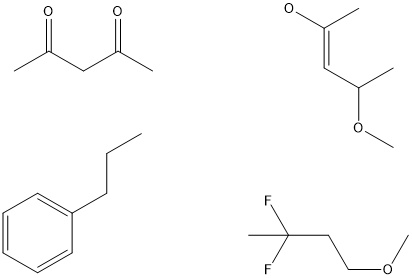
